In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from matplotlib.dates import YearLocator, DateFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import missingno as mno



# Importiere Datensätze

In [128]:
df_train = pd.read_csv("dataset/dengue_features_train.csv")
df_labels = pd.read_csv("dataset/dengue_labels_train.csv")

Bearbeite erstmal nur sj

In [129]:
df_sj_train = df_train.loc[df_train['city']=='sj']
df_sj_labels = df_labels.loc[df_labels['city']=='sj']

Gib den Tag anhand des Datums in week_start_date aus

In [130]:
df_sj_train['day'] = pd.to_datetime(df_sj_train['week_start_date']).dt.day_name()
df_sj_train.insert(df_sj_train.columns.get_loc("week_start_date"), "day", df_sj_train.pop("day"))
df_sj_train['week_start_date'] = pd.to_datetime(df_sj_train['week_start_date'], format='%Y-%m-%d')

C:\Users\rener\AppData\Local\Temp\ipykernel_9012\4236921693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_train['day'] = pd.to_datetime(df_sj_train['week_start_date']).dt.day_name()
C:\Users\rener\AppData\Local\Temp\ipykernel_9012\4236921693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_train['week_start_date'] = pd.to_datetime(df_sj_train['week_start_date'], format='%Y-%m-%d')


Laut dem letzten Kommentar von https://community.drivendata.org/t/week-53-in-features-data/2350/4
hat der Kommentator alle Wochen inkrementiert

Erstelle neuen Dataframe mit week_start_date aus dengue_features_train und total_cases aus dengue_labels_train - erstmal nur sj

In [131]:
df_sj_shortened = pd.DataFrame({
    'week_start_date': df_sj_train['week_start_date'],
    'total_cases': df_sj_labels['total_cases']
})

Erstelle Graph

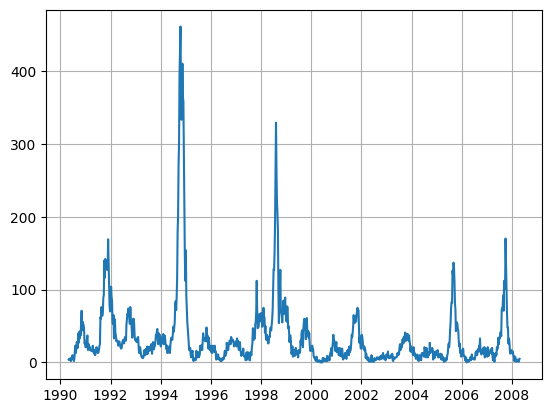

In [132]:
plt.plot(df_sj_shortened['week_start_date'],df_sj_shortened['total_cases'])
plt.grid()
plt.show()

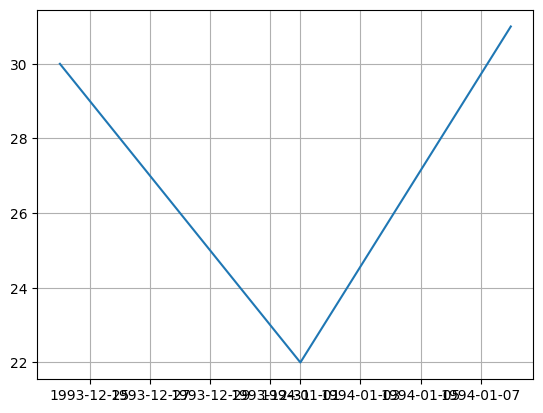

In [133]:
df_sj_period = df_sj_shortened[(df_sj_shortened['week_start_date'] >= '1993-12-24') & (df_sj_shortened['week_start_date'] <= '1994-01-08')]
plt.plot(df_sj_period['week_start_date'],df_sj_period['total_cases'])
plt.grid()
plt.show()

Erstelle neue Wochenanzahl nach den Originaldaten

In [134]:
df_sj_train['weekofyear_new'] = (df_sj_train.index % 52) + 1
print('success')

success


C:\Users\rener\AppData\Local\Temp\ipykernel_9012\1890699554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_train['weekofyear_new'] = (df_sj_train.index % 52) + 1


# Nicht relevante Spalten verwerfen

In [135]:
df_sj_whole = df_sj_train
df_sj_whole.insert(3, "total_cases", df_sj_labels['total_cases'])
df_sj_whole.drop(['year','weekofyear','weekofyear_new'],axis=1, inplace=True)
df_sj_whole.describe()

C:\Users\rener\AppData\Local\Temp\ipykernel_9012\2328321457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_whole.drop(['year','weekofyear_new'],axis=1, inplace=True)


,weekofyear,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,936.000000,936.000000,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,...,930.000000,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,26.503205,34.180556,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,...,30.465419,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484
std,15.021909,51.381372,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,...,35.628055,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811
min,1.000000,0.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,...,0.000000,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000
25%,13.750000,9.000000,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,298.300000,293.847857,...,10.825000,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000
50%,26.500000,19.000000,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,299.378571,295.464286,...,21.300000,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000
75%,39.250000,37.000000,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,300.228571,296.418929,...,37.000000,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000
max,53.000000,461.000000,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,...,570.500000,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000


# Umgang mit fehlenden Daten
1. Darstellung fehlender Daten
2. Train-, Testdaten split

<AxesSubplot: >

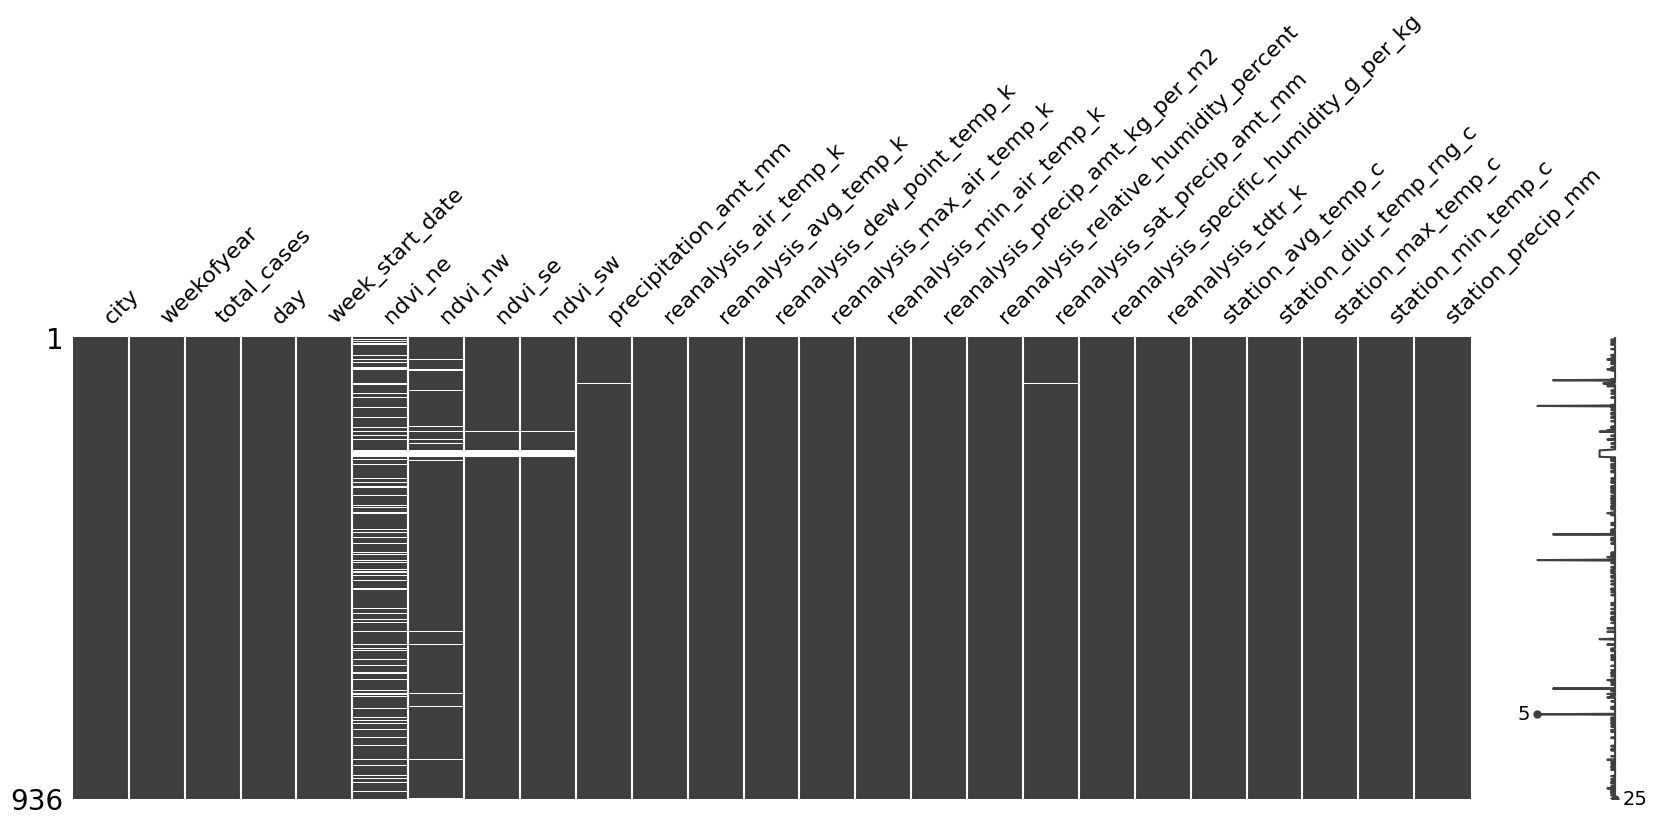

In [136]:
mno.matrix(df_sj_whole, figsize = (20, 6))

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(
    df_sj_whole.dropna(subset=['Feature1', 'Feature2']), df_sj_whole['total_cases'].dropna(), test_size=0.3, random_state=42
)

# Erstelle Decision Trees